In [119]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Rules
* There are 38 numbers: (1-36) which are red/black and (0, 00) which are green

In [6]:
roulette_wheel = ['R'] * 18 + ['B'] * 18 + ['0','00']

In [10]:
def single_spin(roulette_wheel):
    return random.choice(roulette_wheel)

In [73]:
def strategy(roulette_wheel, num_of_spins, initial_bet, increment, type='multiple'):
    list_of_spins = []
    list_of_bets = []
    bet = initial_bet
    payout = 0
    for i in range(num_of_spins):
        spin = single_spin(roulette_wheel)
        if spin == 'B':
            payout += bet
            list_of_bets.append(bet)
            list_of_spins.append(spin)
            break
        else:
            if type=='multiple':
                list_of_bets.append(bet)
                payout -= bet
                bet *= increment
            elif type=='add':
                list_of_bets.append(bet)
                payout -= bet
                bet += increment
            list_of_spins.append(spin)
    return list_of_spins, list_of_bets, payout

In [86]:
strategy(roulette_wheel, num_of_spins=10, initial_bet=10, increment=3, type='multiple')

(['B'], [10], 10)

In [91]:
def loop(num_of_loops, roulette_wheel, num_of_spins, initial_bet, increment, type='multiple'):
    payout_list = []
    num_of_rolls = []
    for i in range(num_of_loops):
        list_of_spins, list_of_bets, payout = strategy(roulette_wheel, num_of_spins, initial_bet, increment, type='multiple')
        payout_list.append(payout)
        num_of_rolls.append(len(list_of_spins))
    return payout_list, num_of_rolls

In [118]:
payout_list, num_of_rolls = loop(1000, roulette_wheel, num_of_spins=10, initial_bet=2.29, increment=3, type='multiple')
print(np.mean(payout_list))
print(np.mean(num_of_rolls))

-63.31850000000003
2.1


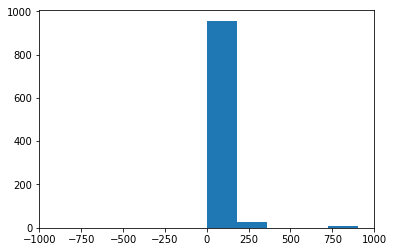

In [131]:
plt.hist(payout_list, bins=500)
plt.xlim([-1000,1000])
plt.show()